In [133]:
import numpy as np
import matplotlib.pyplot as plt
img=plt.imread('5.jpg')
gray_img=np.mean(img,axis=-1).astype(np.uint8)
# plt.imshow(gray_img,cmap='gray')

In [134]:
height, width=gray_img.shape
total=0
sum=0
for i in range(height):
    for j in range(width):
        if i==0 or j==0 or j==width-1 or i==height-1:
            total+=1
            sum+=gray_img[i][j]
boundary_size=sum//total

# border_img = np.zeros((height + 2 * boundary_size, width + 2 * boundary_size), dtype=np.uint8)
border_img = np.full((height + 2 * boundary_size, width + 2 * boundary_size), 100, dtype=np.uint8)
# border_img = np.full((height + 2 * boundary_size, width + 2 * boundary_size), boundary_size, dtype=np.uint8)

for i in range(boundary_size,boundary_size+height):
    for j in range(boundary_size,boundary_size+width):
        border_img[i][j]=gray_img[i-boundary_size][j-boundary_size]

plt.imshow(border_img,cmap='gray')
# gray_img.shape

In [135]:
boundary_size

79

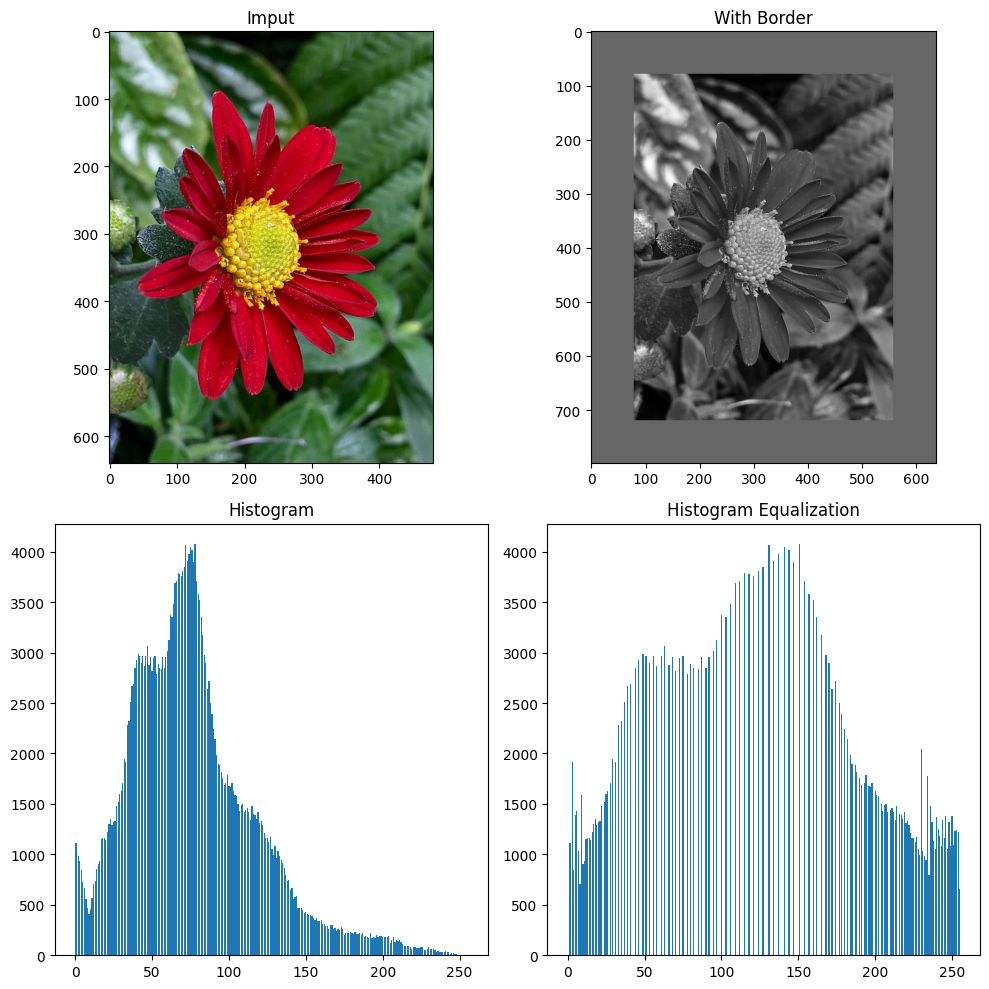

In [139]:
def histogram(img):
    histogram = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram[img[i,j]] += 1
    return histogram
def pdf(histo):
    return histo / np.sum(histo)
def cdf(pdf_value):
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = np.sum(pdf_value[:i+1])
    return cdf
def hist_equalization(cdf, histo):
    hist_equalization_multiple = np.round(cdf * 255).astype(np.uint8)
    hist_equalization = np.zeros(256)
    for i in range(256):
        hist_equalization[hist_equalization_multiple[i]] += histo[i]
    return hist_equalization
def plot_histogram(h):
    plt.bar(np.arange(256), h)
    plt.show()
histo = histogram(gray_img)
pdf_value = pdf(histo)
cdf = cdf(pdf_value)
hist_equa = hist_equalization(cdf, histo)
cdf_multiple = np.round(cdf * 255).astype(np.uint8)

# equi_img = np.zeros((height, width), "uint8")
# for i in range(height):
#     for j in range(width):
#         equi_img[i][j] = cdf_multiple[gray_img[i][j]]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].set_title('Imput')
# axs[0][0].imshow(gray_img, cmap='gray')
axs[0][0].imshow(img)
axs[0][1].set_title('With Border')
axs[0][1].imshow(border_img, cmap='gray')
axs[1][0].set_title('Histogram')
axs[1][0].bar( np.arange(256), histo )
axs[1][1].set_title('Histogram Equalization')
axs[1][1].bar( np.arange(256), hist_equa )
plt.tight_layout()
plt.show()
